In [31]:
import gym
env = gym.make('CartPole-v1', render_mode = 'human')

In [32]:
import mlflow

# connect mlflow client to the mlflow server that runs on localhost:5000
MLFLOW_SERVER_URI = 'http://localhost:5000'
mlflow.set_tracking_uri(str(MLFLOW_SERVER_URI))

EXPERIMENT_NAME = 'hyperparameter_search'
mlflow.set_experiment(EXPERIMENT_NAME)

<Experiment: artifact_location='mlflow-artifacts:/372391382498284927', creation_time=1704370472026, experiment_id='372391382498284927', last_update_time=1704370472026, lifecycle_stage='active', name='hyperparameter_search', tags={}>

In [33]:
import optuna

from config import OPTUNA_DB

study = optuna.create_study(
    study_name=EXPERIMENT_NAME,
    direction='maximize',
    load_if_exists=True,
    storage=f'sqlite:///{OPTUNA_DB}'
)

[I 2024-01-17 08:54:19,717] Using an existing study with name 'hyperparameter_search' instead of creating a new one.


In [34]:
from optimize_hyperparameters import objective

# we define a lambda function because study.optimize()
# expect the objective function to have only 1 input
# (trial), while our objective function hast 2 extra
# inputs I defined to add flexibility to the script
func = lambda trial: objective(trial,
                               force_linear_model=False,
                               n_episodes_to_train=200)

In [35]:
class CheckHyperparamMeanRewardThreshold:
    def __init__(self, reward_threshold: float):
        self.reward_threshold = reward_threshold

    def __call__(self, study: optuna.study.Study, trial: optuna.trial.FrozenTrial) -> None:
        if trial.value >= self.reward_threshold:
            print((f'Stopping hyperparameter search because trial.value ({trial.value}) '
                   f'hit threshold ({self.reward_threshold})'))
            study.stop()

# Stop hyperparameter search when we hit a perfect mean reward of 500
hyperparam_search_stop_callback = CheckHyperparamMeanRewardThreshold(500.0)

In [36]:
study.optimize(func, n_trials=1000, callbacks=[hyperparam_search_stop_callback], show_progress_bar=True)

  0%|          | 0/1000 [00:00<?, ?it/s]c:\Users\Ploita\anaconda3\envs\Dissertacao\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)
c:\Users\Ploita\Documents\GitHub\PlanoB\optimize_hyperparameters.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-2)
c:\Users\Ploita\Documents\GitHub\PlanoB\optimize_hyperparameters.py:61: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  epsilon_end = trial.suggest_uniform("epsilon_end", 0, 0.2)


67,586 parameters




































100%|██████████| 200/200 [02:01<00:00,  1.64it/s]


Reward mean: 177.44, std: 8.11
Num steps mean: 177.44, std: 8.11


Best trial: 90. Best value: 500:   0%|          | 1/1000 [02:46<46:06:47, 166.17s/it]

[I 2024-01-17 08:57:05,930] Trial 91 finished with value: 175.574 and parameters: {'learning_rate': 0.00014400044554744315, 'discount_factor': 0.95, 'batch_size': 32, 'memory_size': 10000, 'freq_steps_train': 8, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 10, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.07190269227526566, 'steps_epsilon_decay': 10000, 'seed': 511918785}. Best is trial 90 with value: 500.0.
67,586 parameters























































100%|██████████| 200/200 [02:50<00:00,  1.17it/s]


Reward mean: 258.34, std: 61.30
Num steps mean: 258.34, std: 61.30


Best trial: 90. Best value: 500:   0%|          | 2/1000 [07:03<60:59:38, 220.02s/it]

[I 2024-01-17 09:01:23,636] Trial 92 finished with value: 259.645 and parameters: {'learning_rate': 5.96658402032374e-05, 'discount_factor': 0.95, 'batch_size': 32, 'memory_size': 10000, 'freq_steps_train': 8, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 10, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.06344970782576101, 'steps_epsilon_decay': 10000, 'seed': 434734380}. Best is trial 90 with value: 500.0.
67,586 parameters


























































100%|██████████| 200/200 [04:28<00:00,  1.34s/it]


Reward mean: 236.89, std: 49.58
Num steps mean: 236.89, std: 49.58


Best trial: 90. Best value: 500:   0%|          | 3/1000 [12:43<76:01:37, 274.52s/it]

[I 2024-01-17 09:07:03,014] Trial 93 finished with value: 223.796 and parameters: {'learning_rate': 6.264932067707466e-05, 'discount_factor': 0.95, 'batch_size': 32, 'memory_size': 10000, 'freq_steps_train': 8, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 10, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.06452604326493197, 'steps_epsilon_decay': 10000, 'seed': 427900534}. Best is trial 90 with value: 500.0.
67,586 parameters




















































100%|██████████| 200/200 [02:11<00:00,  1.52it/s]


Reward mean: 206.17, std: 84.17
Num steps mean: 206.17, std: 84.17


Best trial: 90. Best value: 500:   0%|          | 4/1000 [15:59<67:25:36, 243.71s/it]

[I 2024-01-17 09:10:19,495] Trial 94 finished with value: 207.464 and parameters: {'learning_rate': 0.0005579579979817235, 'discount_factor': 0.95, 'batch_size': 32, 'memory_size': 10000, 'freq_steps_train': 8, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 10, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.06725633338859516, 'steps_epsilon_decay': 10000, 'seed': 360423048}. Best is trial 90 with value: 500.0.
67,586 parameters




















































100%|██████████| 200/200 [02:31<00:00,  1.32it/s]


Reward mean: 226.01, std: 56.52
Num steps mean: 226.01, std: 56.52


Best trial: 90. Best value: 500:   0%|          | 5/1000 [19:46<65:39:02, 237.53s/it]

[I 2024-01-17 09:14:06,066] Trial 95 finished with value: 227.024 and parameters: {'learning_rate': 3.3935876201704805e-05, 'discount_factor': 0.95, 'batch_size': 32, 'memory_size': 10000, 'freq_steps_train': 8, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 10, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.035804927992263376, 'steps_epsilon_decay': 10000, 'seed': 395755520}. Best is trial 90 with value: 500.0.
67,586 parameters







100%|██████████| 200/200 [00:01<00:00, 100.43it/s]


Reward mean: 13.55, std: 1.61
Num steps mean: 13.55, std: 1.61


Best trial: 90. Best value: 500:   1%|          | 6/1000 [19:53<43:58:13, 159.25s/it]

[I 2024-01-17 09:14:13,349] Trial 96 finished with value: 13.653 and parameters: {'learning_rate': 9.108565412098738e-05, 'discount_factor': 0.95, 'batch_size': 32, 'memory_size': 100000, 'freq_steps_train': 128, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 4, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 10, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.07846580159435723, 'steps_epsilon_decay': 10000, 'seed': 515868628}. Best is trial 90 with value: 500.0.
67,586 parameters










































































100%|██████████| 200/200 [04:16<00:00,  1.28s/it]


Reward mean: 335.34, std: 68.72
Num steps mean: 335.34, std: 68.72


Best trial: 90. Best value: 500:   1%|          | 7/1000 [26:05<63:04:54, 228.70s/it]

[I 2024-01-17 09:20:25,028] Trial 97 finished with value: 340.114 and parameters: {'learning_rate': 5.666841693601493e-05, 'discount_factor': 0.95, 'batch_size': 32, 'memory_size': 10000, 'freq_steps_train': 8, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 10, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.047113391318743855, 'steps_epsilon_decay': 10000, 'seed': 417566201}. Best is trial 90 with value: 500.0.
67,586 parameters





100%|██████████| 200/200 [00:12<00:00, 15.44it/s]


Reward mean: 9.44, std: 0.79
Num steps mean: 9.44, std: 0.79


Best trial: 90. Best value: 500:   1%|          | 8/1000 [26:21<44:23:45, 161.11s/it]

[I 2024-01-17 09:20:41,435] Trial 98 finished with value: 9.359 and parameters: {'learning_rate': 2.6826859751065453e-05, 'discount_factor': 0.95, 'batch_size': 32, 'memory_size': 50000, 'freq_steps_train': 16, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 10, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.021533294533650105, 'steps_epsilon_decay': 1000, 'seed': 454381955}. Best is trial 90 with value: 500.0.
67,586 parameters






100%|██████████| 200/200 [00:01<00:00, 137.72it/s]


Reward mean: 9.45, std: 0.83
Num steps mean: 9.45, std: 0.83


Best trial: 90. Best value: 500:   1%|          | 9/1000 [26:27<30:57:55, 112.49s/it]

[I 2024-01-17 09:20:47,006] Trial 99 finished with value: 9.359 and parameters: {'learning_rate': 4.907891528496744e-05, 'discount_factor': 0.95, 'batch_size': 32, 'memory_size': 10000, 'freq_steps_train': 8, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 5000, 'n_gradient_steps': 1, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 10, 'normalize_state': True, 'epsilon_start': 0.9, 'epsilon_end': 0.057339972109716746, 'steps_epsilon_decay': 10000, 'seed': 485905346}. Best is trial 90 with value: 500.0.
67,586 parameters





100%|██████████| 200/200 [00:02<00:00, 90.33it/s]


Reward mean: 9.50, std: 0.94
Num steps mean: 9.50, std: 0.94


Best trial: 90. Best value: 500:   1%|          | 10/1000 [26:33<21:53:39, 79.62s/it]

[I 2024-01-17 09:20:53,007] Trial 100 finished with value: 9.334 and parameters: {'learning_rate': 3.554399259003804e-05, 'discount_factor': 0.95, 'batch_size': 32, 'memory_size': 100000, 'freq_steps_train': 256, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 10, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.0556601241867396, 'steps_epsilon_decay': 10000, 'seed': 545957343}. Best is trial 90 with value: 500.0.
67,586 parameters





















































100%|██████████| 200/200 [04:07<00:00,  1.24s/it]


Reward mean: 300.45, std: 65.56
Num steps mean: 300.45, std: 65.56


Best trial: 90. Best value: 500:   1%|          | 11/1000 [32:16<43:59:54, 160.16s/it]

[I 2024-01-17 09:26:35,790] Trial 101 finished with value: 295.833 and parameters: {'learning_rate': 5.9433846297051344e-05, 'discount_factor': 0.95, 'batch_size': 32, 'memory_size': 10000, 'freq_steps_train': 8, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 10, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.047679070940946276, 'steps_epsilon_decay': 10000, 'seed': 421020943}. Best is trial 90 with value: 500.0.
67,586 parameters





















































100%|██████████| 200/200 [04:43<00:00,  1.42s/it]


Reward mean: 288.34, std: 59.77
Num steps mean: 288.34, std: 59.77


Best trial: 90. Best value: 500:   1%|          | 12/1000 [38:31<61:57:09, 225.74s/it]

[I 2024-01-17 09:32:51,532] Trial 102 finished with value: 296.395 and parameters: {'learning_rate': 6.772421545353745e-05, 'discount_factor': 0.95, 'batch_size': 32, 'memory_size': 10000, 'freq_steps_train': 8, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 10, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.047135100240096456, 'steps_epsilon_decay': 10000, 'seed': 420721919}. Best is trial 90 with value: 500.0.
67,586 parameters
















































100%|██████████| 200/200 [04:45<00:00,  1.43s/it]


Reward mean: 221.01, std: 49.64
Num steps mean: 221.01, std: 49.64


Best trial: 90. Best value: 500:   1%|▏         | 13/1000 [44:21<72:13:08, 263.41s/it]

[I 2024-01-17 09:38:41,637] Trial 103 finished with value: 219.991 and parameters: {'learning_rate': 7.077934995082026e-05, 'discount_factor': 0.95, 'batch_size': 32, 'memory_size': 10000, 'freq_steps_train': 8, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 10, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.05227642217742583, 'steps_epsilon_decay': 10000, 'seed': 420591069}. Best is trial 90 with value: 500.0.
67,586 parameters







































































































100%|██████████| 200/200 [04:45<00:00,  1.43s/it]


Reward mean: 500.00, std: 0.00
Num steps mean: 500.00, std: 0.00


Best trial: 90. Best value: 500:   1%|▏         | 14/1000 [51:45<60:45:21, 221.83s/it]

[I 2024-01-17 09:46:05,332] Trial 104 finished with value: 500.0 and parameters: {'learning_rate': 0.00010189357484905911, 'discount_factor': 0.95, 'batch_size': 32, 'memory_size': 10000, 'freq_steps_train': 8, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 10, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.04732023974091817, 'steps_epsilon_decay': 10000, 'seed': 353469278}. Best is trial 90 with value: 500.0.
Stopping hyperparameter search because trial.value (500.0) hit threshold (500.0)


In [42]:
best_trial = study.best_trial

hparams = {k: best_trial.params[k] for k in best_trial.params if k != 'seed'}
#hparams['nn_hidden_layers'] = eval(hparams['nn_hidden_layers']) 
print(hparams)

SEED = best_trial.params['seed']
print('Seed: ', SEED)

{'learning_rate': 0.00015139148676185588, 'discount_factor': 0.95, 'batch_size': 32, 'memory_size': 10000, 'freq_steps_train': 8, 'freq_steps_update_target': 10, 'n_steps_warm_up_memory': 1000, 'n_gradient_steps': 16, 'nn_hidden_layers': [256, 256], 'max_grad_norm': 10, 'normalize_state': False, 'epsilon_start': 0.9, 'epsilon_end': 0.0689350255655134, 'steps_epsilon_decay': 10000}
Seed:  450806319


In [43]:
from utils import set_seed
set_seed(env, SEED)

from q_agent import QAgent
agent = QAgent(env, **hparams)

from loops import train
train_rewards, train_steps = train(agent, env, n_episodes=2)

67,586 parameters


  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:01<00:00,  1.89it/s]


TypeError: cannot unpack non-iterable NoneType object

In [ ]:
agent = QAgent(env, **hparams)

from loops import train
train_rewards, train_steps = train(agent, env, n_episodes=2)

In [ ]:
plt.plot(range(1, len(train_rewards) + 1), train_rewards, label='Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Rewards per Episode')
plt.legend()
plt.show()

In [ ]:
from q_agent import QAgent
from config import SAVED_AGENTS_DIR

# you can find the agent_id for the best run in the MLflow
# dashboard.
# 298 is the value in my case, but you need to check what is your
agent_id = 90

path_to_saved_model = SAVED_AGENTS_DIR / 'CartPole-v1' / str(agent_id)
agent = QAgent.load_from_disk(env, path_to_saved_model)

67,586 parameters


In [ ]:
from loops import evaluate
rewards, steps = evaluate(
    agent, env,
    n_episodes=1000,
    epsilon=0.00
)

100%|██████████| 1000/1000 [2:51:48<00:00, 10.31s/it] 


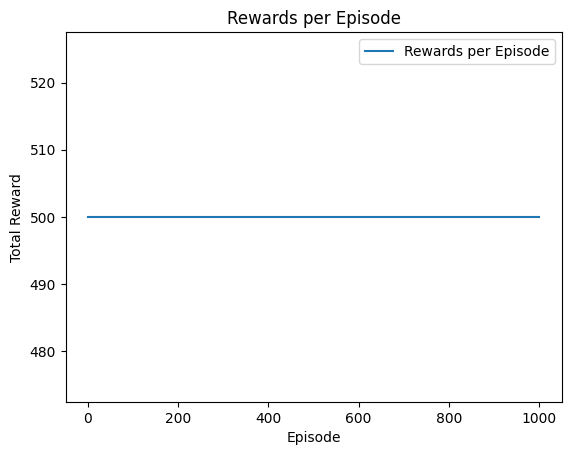

In [ ]:
plt.plot(range(1, len(rewards) + 1), rewards, label='Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Rewards per Episode')
plt.legend()
plt.show()

In [ ]:
import numpy as np
reward_avg = np.array(rewards).mean()
reward_std = np.array(rewards).std()
print(f'Reward average {reward_avg:.2f}, std {reward_std:.2f}')

Reward average 500.00, std 0.00


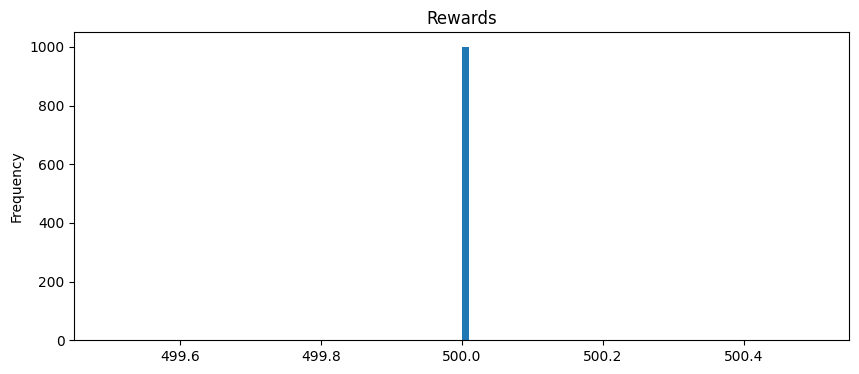

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize = (10, 4))
ax.set_title("Rewards")    
pd.Series(rewards).plot(kind='hist', bins=100)

plt.show()

Seria bom o gráfico de progresso do treino